### How well do jobs and skills pay for Data Analysts?

#### Methodology

1. Evaluate median salary for top 8 data jobs
2. Find median salary per skill for Data Analysts
3. Visualise for highest paying skills and and most in-demand skills

In [1]:
# Import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'../data/data_jobs.csv')

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

### Filter for All Data Jobs in Australia

In [6]:
df_aus = df[df['job_country'] == 'Australia'].copy()
df_aus['job_posted_month_no'] = df_aus['job_posted_date'].dt.month # Create month number column
df_aus = df_aus.dropna(subset='salary_year_avg') # Remove any rows with missing values for avg yearly salary
print(df_aus['job_title_short'].value_counts(),'\n')
print(df_aus['job_country'].value_counts(),'\n')
print(df_aus.info())

job_title_short
Data Engineer                30
Senior Data Engineer          9
Machine Learning Engineer     7
Data Scientist                7
Software Engineer             6
Senior Data Scientist         5
Data Analyst                  4
Business Analyst              3
Senior Data Analyst           2
Cloud Engineer                1
Name: count, dtype: int64 

job_country
Australia    74
Name: count, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 26330 to 782374
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        74 non-null     object        
 1   job_title              74 non-null     object        
 2   job_location           74 non-null     object        
 3   job_via                74 non-null     object        
 4   job_schedule_type      74 non-null     object        
 5   job_work_from_home     74 non-null     bool          
 6

In [19]:
# Get list of top 8 data jobs
job_titles = df_aus['job_title_short'].value_counts().sort_values(ascending=False).head(8).index.tolist()
job_titles

['Data Engineer',
 'Senior Data Engineer',
 'Machine Learning Engineer',
 'Data Scientist',
 'Software Engineer',
 'Senior Data Scientist',
 'Data Analyst',
 'Business Analyst']

In [32]:
# Filter dataframe for top 8 jobs
df_top_8 = df_aus[df_aus['job_title_short'].isin(job_titles)]
df_top_8 = df_top_8.sort_values(by='salary_year_avg', ascending=False)
df_top_8

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
660819,Software Engineer,Staff Software Engineer - MLOps,"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-06 10:16:46,False,False,Australia,year,257500.0,NaN,Rokt,"[golang, c#, python, typescript, go, aws]","{'cloud': ['aws'], 'programming': ['golang', '...",7
375114,Software Engineer,Senior Software Engineer,"Sydney NSW, Australia",via EchoJobs,Full-time,False,Australia,2023-09-29 18:23:27,False,False,Australia,year,245000.0,NaN,ROKT,"[golang, c#, python, java, aws]","{'cloud': ['aws'], 'programming': ['golang', '...",9
700069,Machine Learning Engineer,AI/ML Engineer,"Eveleigh NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-03-12 03:19:02,False,False,Australia,year,185500.0,NaN,presien,"[shell, python, pytorch, tensorflow, opencv, n...","{'libraries': ['pytorch', 'tensorflow', 'openc...",3
516717,Data Scientist,"Lead Data Scientist, Product Platform","Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-11-12 11:31:02,False,False,Australia,year,170575.0,NaN,Canva,"[sql, python, snowflake, redshift, bigquery]","{'cloud': ['snowflake', 'redshift', 'bigquery'...",11
56804,Machine Learning Engineer,Senior Machine Learning Engineer,"Melbourne VIC, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-13 06:15:50,False,False,Australia,year,166000.0,NaN,Block,"[java, javascript, python, kotlin, ruby, ruby,...","{'databases': ['redis', 'cassandra', 'mysql'],...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463394,Senior Data Engineer,"Senior Full-stack, Frontend & Backend Data Eng...",Anywhere,via Wellfound,Part-time and Contractor,True,Australia,2023-11-24 14:15:36,True,False,Australia,year,70000.0,NaN,We Are Distributed,"[javascript, express]","{'programming': ['javascript'], 'webframeworks...",11
518865,Business Analyst,BI Analyst,"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-19 11:23:34,False,False,Australia,year,63000.0,NaN,THE ICONIC,"[sql, python, r, bigquery, snowflake, redshift...","{'analyst_tools': ['looker', 'tableau', 'power...",7
565561,Data Analyst,FM Data Analyst,"Balcatta WA, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-21 04:45:28,False,False,Australia,year,57500.0,NaN,Sodexo,"[sql, c, excel]","{'analyst_tools': ['excel'], 'programming': ['...",7
652128,Software Engineer,Senior Staff Software Engineer - Data Lake,Australia (+16 others),via Levels.fyi,Full-time,False,Australia,2023-11-21 10:38:20,True,False,Australia,year,33455.0,NaN,Fivetran,"[java, aws, gcp, azure, kubernetes]","{'cloud': ['aws', 'gcp', 'azure'], 'other': ['...",11


In [59]:
# View number of job postings for each of the top 8 jobs
df_top_8.groupby('job_title_short')['job_title_short'].size().sort_values(ascending=False)

job_title_short
Data Engineer                30
Senior Data Engineer          9
Machine Learning Engineer     7
Data Scientist                7
Software Engineer             6
Senior Data Scientist         5
Data Analyst                  4
Business Analyst              3
Name: job_title_short, dtype: int64

In [54]:
# Find median salaries for each of the top 8 jobs - use to sort boxplot order
job_order = df_top_8.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Software Engineer', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Business Analyst'],
      dtype='object', name='job_title_short')

### Create Boxplots for Top 8 Data Jobs

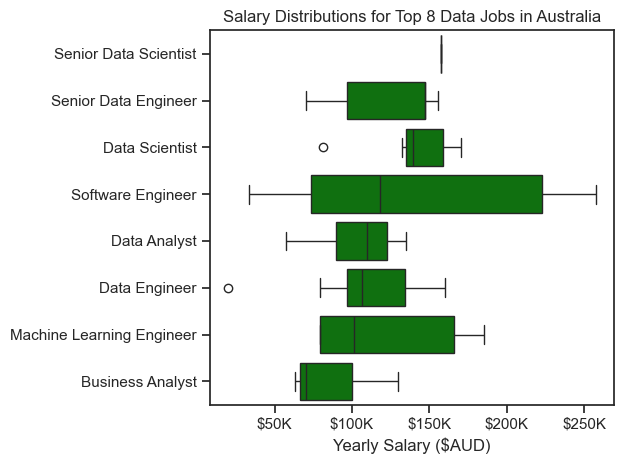

In [56]:
sns.boxplot(data=df_top_8, x='salary_year_avg', y='job_title_short', order=job_order, color='green')
sns.set_theme(style='ticks')
plt.title('Salary Distributions for Top 8 Data Jobs in Australia')
plt.xlabel('Yearly Salary ($AUD)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.tight_layout()
plt.show()

### Investigate Median Salary vs Skill for Data Analysts

In [62]:
# Filter for data analyst jobs in Australia
df_DA_aus = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Australia')].copy()
df_DA_aus = df_DA_aus.dropna(subset='salary_year_avg')
print(df_DA_aus['job_title_short'].value_counts(),'\n')
print(df_DA_aus['job_country'].value_counts(),'\n')
print(df_DA_aus.info())

job_title_short
Data Analyst    4
Name: count, dtype: int64 

job_country
Australia    4
Name: count, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 42522 to 565561
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        4 non-null      object        
 1   job_title              4 non-null      object        
 2   job_location           4 non-null      object        
 3   job_via                4 non-null      object        
 4   job_schedule_type      4 non-null      object        
 5   job_work_from_home     4 non-null      bool          
 6   search_location        4 non-null      object        
 7   job_posted_date        4 non-null      datetime64[ns]
 8   job_no_degree_mention  4 non-null      bool          
 9   job_health_insurance   4 non-null      bool          
 10  job_country            4 non-null      object        
 11  salary

In [73]:
# Expand job_skills column so each row contains one skill
df_DA_aus = df_DA_aus.explode('job_skills')
df_DA_aus

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
42522,Data Analyst,Data Analyst / Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-06-29 06:35:56,True,False,Australia,year,135000.0,NaN,Perigon Group,sql,"{'analyst_tools': ['tableau'], 'cloud': ['snow..."
42522,Data Analyst,Data Analyst / Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-06-29 06:35:56,True,False,Australia,year,135000.0,NaN,Perigon Group,snowflake,"{'analyst_tools': ['tableau'], 'cloud': ['snow..."
42522,Data Analyst,Data Analyst / Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-06-29 06:35:56,True,False,Australia,year,135000.0,NaN,Perigon Group,tableau,"{'analyst_tools': ['tableau'], 'cloud': ['snow..."
407319,Data Analyst,Data Analyst - MarTech,"Brisbane QLD, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-24 16:22:38,True,False,Australia,year,100500.0,NaN,Entain,sql,"{'analyst_tools': ['excel', 'power bi', 'dax']..."
407319,Data Analyst,Data Analyst - MarTech,"Brisbane QLD, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-24 16:22:38,True,False,Australia,year,100500.0,NaN,Entain,snowflake,"{'analyst_tools': ['excel', 'power bi', 'dax']..."
407319,Data Analyst,Data Analyst - MarTech,"Brisbane QLD, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-24 16:22:38,True,False,Australia,year,100500.0,NaN,Entain,bigquery,"{'analyst_tools': ['excel', 'power bi', 'dax']..."
407319,Data Analyst,Data Analyst - MarTech,"Brisbane QLD, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-24 16:22:38,True,False,Australia,year,100500.0,NaN,Entain,express,"{'analyst_tools': ['excel', 'power bi', 'dax']..."
407319,Data Analyst,Data Analyst - MarTech,"Brisbane QLD, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-24 16:22:38,True,False,Australia,year,100500.0,NaN,Entain,excel,"{'analyst_tools': ['excel', 'power bi', 'dax']..."
407319,Data Analyst,Data Analyst - MarTech,"Brisbane QLD, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-24 16:22:38,True,False,Australia,year,100500.0,NaN,Entain,power bi,"{'analyst_tools': ['excel', 'power bi', 'dax']..."
407319,Data Analyst,Data Analyst - MarTech,"Brisbane QLD, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-24 16:22:38,True,False,Australia,year,100500.0,NaN,Entain,dax,"{'analyst_tools': ['excel', 'power bi', 'dax']..."


In [89]:
# Find top paying skills
df_DA_top_skills = df_DA_aus.groupby('job_skills')['salary_year_avg'].agg(['median', 'count']).sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_aus.groupby('job_skills')['salary_year_avg'].agg(['median', 'count']).sort_values(by='median', ascending=False).head(10)

print(df_DA_top_skills, '\n')
print(df_DA_top_pay)

              median  count
job_skills                 
go          118500.0      1
python      118500.0      1
snowflake   117750.0      2
sql         109500.0      4
excel       100500.0      3
bigquery    100500.0      1
express     100500.0      1
dax         100500.0      1
power bi    100500.0      1
c            57500.0      1 

              median  count
job_skills                 
tableau     135000.0      1
python      118500.0      1
go          118500.0      1
r           118500.0      1
snowflake   117750.0      2
sql         109500.0      4
dax         100500.0      1
bigquery    100500.0      1
power bi    100500.0      1
excel       100500.0      3


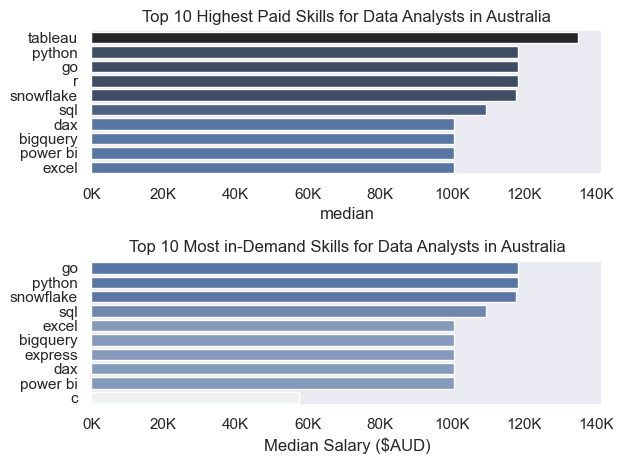

In [90]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='dark')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_xlim(ax[0].get_xlim())
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts in Australia')


sns.barplot(data=df_DA_top_skills, x='median', y=df_DA_top_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($AUD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
ax[1].set_title('Top 10 Most in-Demand Skills for Data Analysts in Australia')

fig.tight_layout()
